In [1]:
# coding: utf-8
# Name: André Moreira Souza
# NUSP: 9778985
# Course Code: SCC0251
# Semester: 2019/1
# Assignment: 2 - Image enhancement and filtering

In [79]:
import numpy as np
import imageio

In [80]:
import matplotlib.pyplot as plt # remove later

## Defining functions

In [74]:
# method 1 - limiarization
def limiarization(img, t0):
    t = 0.5 * (np.nanmean(np.where(img > t0, img, np.NaN)) + np.nanmean(np.where(img <= t0, img, np.NaN))) # calculating threshold
    while(abs(t-t0) > 0.5):
        t0 = t
        m1 = np.nanmean(np.where(img > t, img, np.NaN)) # mean of group1
        m2 = np.nanmean(np.where(img <= t, img, np.NaN)) # mean of group2
        t = 0.5 * (m1 + m2)
    return np.where(img > t, 1, 0)

# method 2 - 1d filtering
def filter1d(img, w):
    imgFlat = img.flatten() # flattening img
    imgFinal = np.zeros(imgFlat.shape, dtype=np.double) # creating new array and applying filter
    for i in range(imgFlat.shape[0]):
        imgFinal[i] = np.sum([imgFlat[(i+j) % imgFlat.shape[0]] * w[j] for j in range(len(w))])
    return imgFinal.reshape(img.shape)
    

# method 3 - 2d filtering
def filter2d(img, w, t0):
    imgPad = np.pad(img, w.shape[0]//2, 'symmetric') # padding input image to apply filter
    imgFinal = np.zeros(img.shape, dtype=np.double) # creating new array and applying filter
    for i in range(0, img.shape[0]):
        for j in range(0, img.shape[1]):
            imgFinal[i][j] = np.sum([[imgPad[i+x][j+y] * w[x][y] for x in range(w.shape[0])] for y in range(w.shape[1])])
    return limiarization(imgFinal, t0) # return limiarization of filtered image

# method 4 - 2d median filter
def medianFilter2d(img, n):
    imgPad = np.pad(img, n//2, 'constant', constant_values = 0)
    imgFinal = np.zeros(img.shape, dtype=np.double)
    for i in range(0, img.shape[0]):
        for j in range(0, img.shape[1]):
            imgFinal[i][j] = np.median(imgPad[i:i+n, j:j+n])
    return imgFinal

# Normalize value of an numpy array between 0 and a given max value
def normalize (arr, maxvalue):
    return (arr-arr.min()) * (maxvalue / (arr.max()-arr.min()))

# root mean squared error (RMSE) function
def rmse (img_g, img_r):
    return np.sqrt((1/(img_g.shape[0]*img_g.shape[1])) * np.sum(np.power(img_g.astype(np.double) - img_r.astype(np.double), 2)))

## Main function

In [91]:
if __name__ == '__main__':
    # get user input
    filename = str(input()).strip()
    sourceImg = imageio.imread(filename)
    method = int(input())
    if method == 1:
        t0 = np.double(input())
        outputImg = normalize(limiarization(sourceImg, t0), 255).astype(np.uint8)
    elif method == 2:
        n = int(input())
        w = np.array(input().split(), dtype=np.double)
        if w.shape[0] != n:
            raise ValueError("unexpected number of values for filter.")
        outputImg = normalize(filter1d(sourceImg, w), 255).astype(np.uint8)
    elif method == 3:
        n = int(input())
        w = np.array([input().split() for i in range(n)], dtype=np.double)
        if w.shape != (n, n):
            raise ValueError("unexpected number of values for filter.")
        t0 = np.double(input())
        outputImg = normalize(filter2d(sourceImg, w, t0), 255).astype(np.uint8)
    elif method == 4:
        n = int(input())
        outputImg = normalize(medianFilter2d(sourceImg, n), 255).astype(np.uint8)
    else:
        raise ValueError("method value not in supported range (minimum = 1, maximum = 4).")
    print('%.4f' % rmse(sourceImg, outputImg))

117.1761


## Additional tests

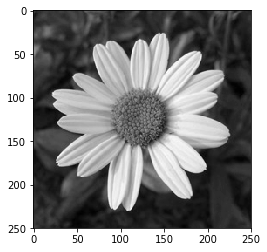

In [92]:
plt.imshow(sourceImg, cmap='gray')

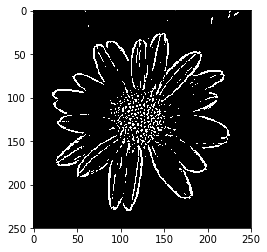

In [93]:
plt.imshow(outputImg, cmap='gray')